In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(style="whitegrid")

In [3]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [4]:
# Display dataset previews
print("Customers Dataset:")
print(customers.head())
print("\nProducts Dataset:")
print(products.head())
print("\nTransactions Dataset:")
print(transactions.head())

Customers Dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166   

In [5]:
# Checking for missing values
print("\nMissing Values:")
print("Customers:\n", customers.isnull().sum())
print("Products:\n", products.isnull().sum())
print("Transactions:\n", transactions.isnull().sum())


Missing Values:
Customers:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Products:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Transactions:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [6]:

# Data Cleaning
# Convert dates to datetime format
customers["SignupDate"] = pd.to_datetime(customers["SignupDate"])
transactions["TransactionDate"] = pd.to_datetime(transactions["TransactionDate"])


In [7]:
# Handle duplicates
customers = customers.drop_duplicates()
products = products.drop_duplicates()
transactions = transactions.drop_duplicates()

In [8]:
# Merge datasets for combined analysis
merged_data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")



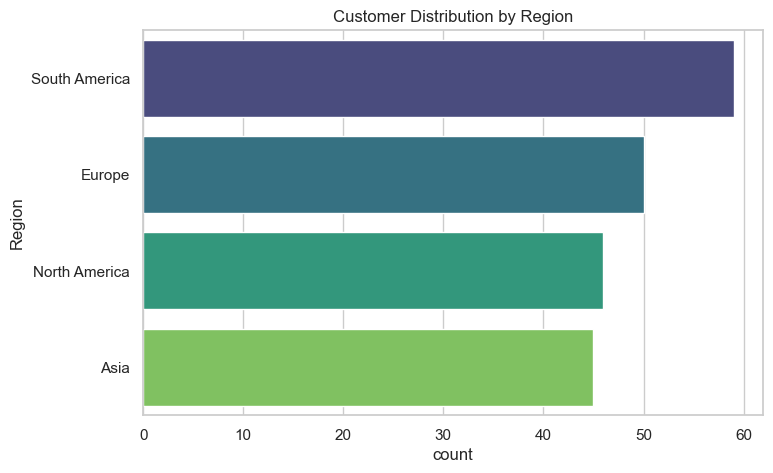

In [9]:
# EDA and Visualization

# 1. Customer Analysis
# Customer distribution by region
plt.figure(figsize=(8, 5))
sns.countplot(y="Region", data=customers, palette="viridis", order=customers["Region"].value_counts().index)
plt.title("Customer Distribution by Region")
plt.show()

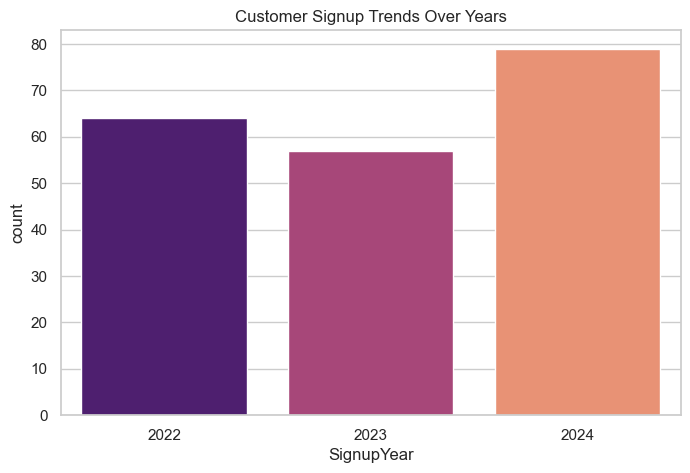

In [10]:
# Signup trends over time
customers["SignupYear"] = customers["SignupDate"].dt.year
plt.figure(figsize=(8, 5))
sns.countplot(x="SignupYear", data=customers, palette="magma")
plt.title("Customer Signup Trends Over Years")
plt.show()

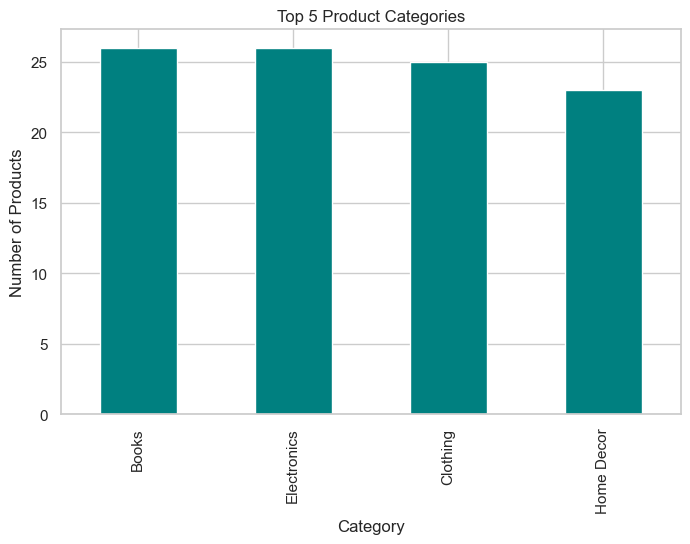

In [11]:
# 2. Product Analysis
# Top 5 most popular product categories
top_categories = products["Category"].value_counts().head(5)
top_categories.plot(kind="bar", color="teal", figsize=(8, 5))
plt.title("Top 5 Product Categories")
plt.xlabel("Category")
plt.ylabel("Number of Products")
plt.show()

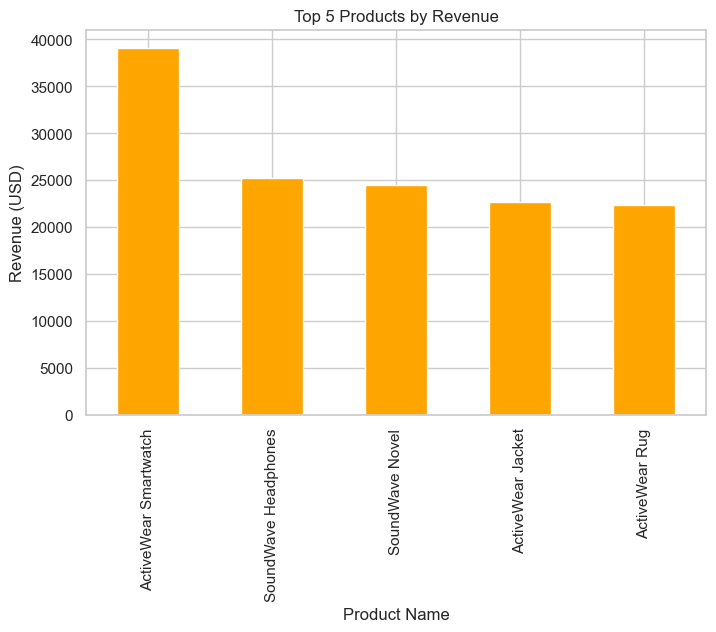

In [12]:

# Products generating the most revenue
product_revenue = merged_data.groupby("ProductName")["TotalValue"].sum().sort_values(ascending=False).head(5)
product_revenue.plot(kind="bar", color="orange", figsize=(8, 5))
plt.title("Top 5 Products by Revenue")
plt.xlabel("Product Name")
plt.ylabel("Revenue (USD)")
plt.show()

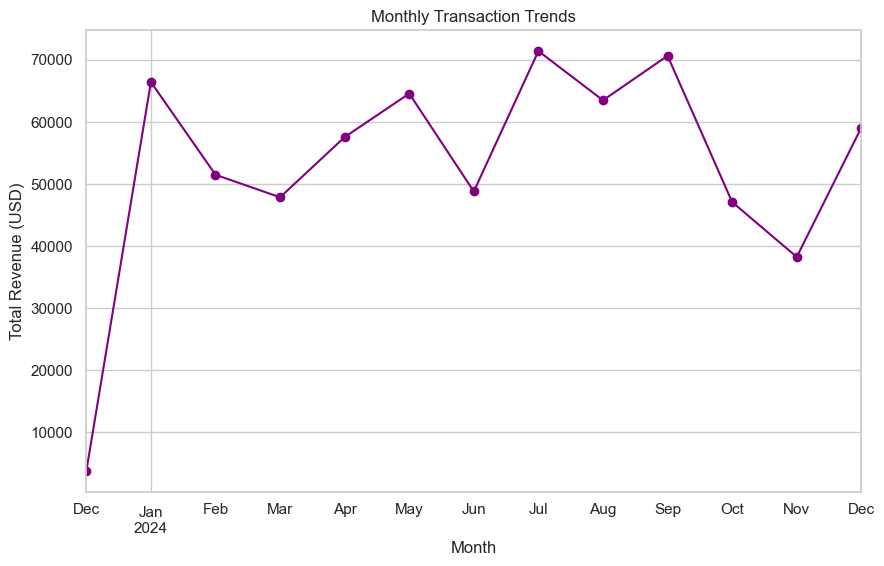

In [13]:
# 3. Transaction Analysis
# Monthly transaction trends
merged_data["TransactionMonth"] = merged_data["TransactionDate"].dt.to_period("M")
monthly_sales = merged_data.groupby("TransactionMonth")["TotalValue"].sum()
monthly_sales.plot(kind="line", marker="o", figsize=(10, 6), color="purple")
plt.title("Monthly Transaction Trends")
plt.xlabel("Month")
plt.ylabel("Total Revenue (USD)")
plt.show()

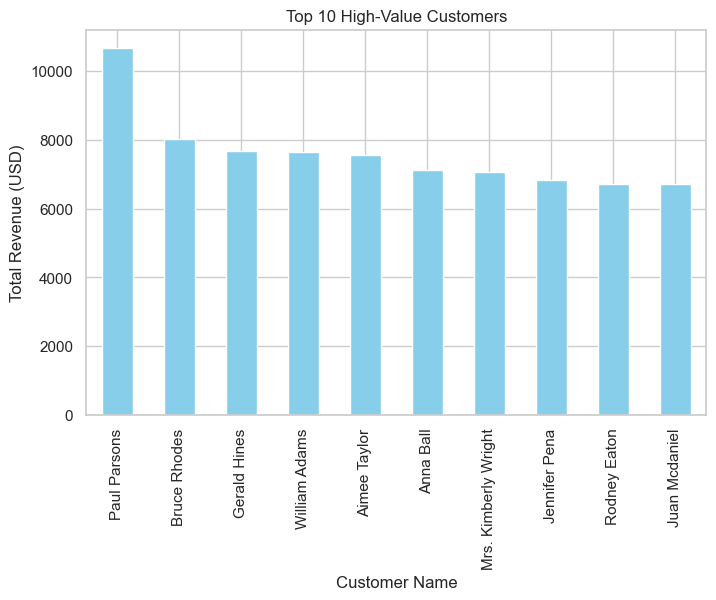

In [14]:
# High-value customers
high_value_customers = merged_data.groupby("CustomerName")["TotalValue"].sum().sort_values(ascending=False).head(10)
high_value_customers.plot(kind="bar", figsize=(8, 5), color="skyblue")
plt.title("Top 10 High-Value Customers")
plt.xlabel("Customer Name")
plt.ylabel("Total Revenue (USD)")
plt.show()

In [16]:
print(merged_data.columns)


Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'CustomerName', 'Region',
       'SignupDate', 'ProductName', 'Category', 'Price_y', 'TransactionMonth'],
      dtype='object')


In [17]:
merged_data.rename(columns={
    "price": "Price",
    "quantity": "Quantity",
    "total_value": "TotalValue"
}, inplace=True)


In [18]:
if "TotalValue" not in merged_data.columns:
    merged_data["TotalValue"] = merged_data["Price"] * merged_data["Quantity"]


Merged Data:
   TransactionID CustomerID ProductID  Quantity  Price  TotalValue
0              1       C001      P001         2   10.0        20.0
1              2       C002      P002         4   20.0        80.0
2              3       C003      P003         1   15.0        15.0


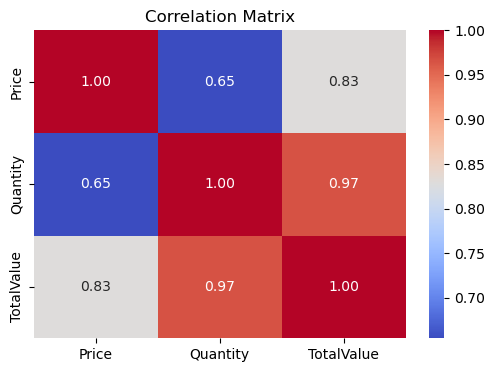

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample datasets
transactions = pd.DataFrame({
    "TransactionID": [1, 2, 3],
    "CustomerID": ["C001", "C002", "C003"],
    "ProductID": ["P001", "P002", "P003"],
    "Quantity": [2, 4, 1]
})

products = pd.DataFrame({
    "ProductID": ["P001", "P002", "P003"],
    "Price": [10.0, 20.0, 15.0]
})

# Merge datasets
merged_data = pd.merge(transactions, products, on="ProductID", how="inner")

# Add TotalValue column
merged_data["TotalValue"] = merged_data["Quantity"] * merged_data["Price"]

# Verify merged_data
print("Merged Data:")
print(merged_data)

# Generate correlation heatmap
corr_matrix = merged_data[["Price", "Quantity", "TotalValue"]].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [ ]:
'''Steps to Build Lookalike Model
1.Data Preparation:

Merge Customers.csv, Products.csv, and Transactions.csv to form a complete dataset.
Aggregate data on transaction history and customer profiles.

2.Feature Engineering:

Generate features such as total revenue, average order value, most frequently purchased categories, etc.
Encode categorical features like Region and Category.

3.Similarity Calculation:

Use a similarity metric like cosine similarity or Euclidean distance to compute customer similarity scores.

4.Recommendation Logic:

For each customer, calculate similarity scores with all other customers.
Select the top 3 most similar customers.

5.Export Results:

Save the top 3 similar customers and their similarity scores for the first 20 customers into a Lookalike.csv file.
'''

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity


In [5]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")


In [6]:
# Merge datasets
data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")


In [8]:
import pandas as pd

# Example dataset
data = pd.DataFrame({
    "CustomerID": ["C001", "C002", "C001", "C003"],
    "ProductID": ["P001", "P002", "P001", "P003"],
    "Quantity": [2, 4, 1, 5],
    "TotalValue": [20.0, 80.0, 10.0, 75.0],
    "Region": ["North", "South", "North", "East"],
    "Category": ["Electronics", "Furniture", "Electronics", "Furniture"]
})

# Ensure Price column exists
if "Price" not in data.columns:
    data["Price"] = data["TotalValue"] / data["Quantity"]

# Aggregate transaction data for each customer
customer_features = data.groupby("CustomerID").agg({
    "TotalValue": "sum",                # Total revenue
    "Quantity": "sum",                  # Total quantity purchased
    "Price": "mean",                    # Average product price
    "Region": "first",                  # Region
    "Category": lambda x: x.mode()[0]   # Most purchased category
}).reset_index()

# Display the customer features
print("Customer Features:")
print(customer_features)


Customer Features:
  CustomerID  TotalValue  Quantity  Price Region     Category
0       C001        30.0         3   10.0  North  Electronics
1       C002        80.0         4   20.0  South    Furniture
2       C003        75.0         5   15.0   East    Furniture


In [9]:
# Encode categorical features
customer_features = pd.get_dummies(customer_features, columns=["Region", "Category"], drop_first=True)


In [10]:
# Normalize numerical features
scaler = StandardScaler()
numerical_cols = ["TotalValue", "Quantity", "Price"]
customer_features[numerical_cols] = scaler.fit_transform(customer_features[numerical_cols])



In [11]:
# Compute similarity scores using cosine similarity
customer_ids = customer_features["CustomerID"]
feature_matrix = customer_features.drop(columns=["CustomerID"]).values
similarity_matrix = cosine_similarity(feature_matrix)


In [12]:
# Generate Lookalike Recommendations
lookalike_map = {}

for idx, customer_id in enumerate(customer_ids[:20]):  # For the first 20 customers
    similarities = list(enumerate(similarity_matrix[idx]))
    similarities = sorted(similarities, key=lambda x: x[1], reverse=True)  # Sort by similarity score
    top_similar = [
        (customer_ids[i], round(score, 4))  # Get customer ID and similarity score
        for i, score in similarities[1:4]  # Exclude self (highest score)
    ]
    lookalike_map[customer_id] = top_similar


In [13]:
# Convert lookalike_map to DataFrame and save as CSV
lookalike_df = pd.DataFrame({
    "CustomerID": lookalike_map.keys(),
    "Lookalikes": [str(v) for v in lookalike_map.values()]
})

lookalike_df.to_csv("Abhilash_R_Lookalike.csv", index=False)
print("Lookalike recommendations saved to Abhilash_R_Lookalike.csv")


Lookalike recommendations saved to Abhilash_R_Lookalike.csv


In [ ]:
'''Task 3: Customer Segmentation / Clustering

Perform customer segmentation using clustering techniques. Use both profile information
(from Customers.csv) and transaction information (from Transactions.csv).
● You have the flexibility to choose any clustering algorithm and any number of clusters in
between(2 and 10)
● Calculate clustering metrics, including the DB Index(Evaluation will be done on this).
● Visualise your clusters using relevant plots.

1.Deliverables:
● A report on your clustering results, including:
○ The number of clusters formed.
○ DB Index value.
○ Other relevant clustering metrics.
● A Jupyter Notebook/Python script containing your clustering code.

2.Evaluation Criteria:
● Clustering logic and metrics.
● Visual representation of clusters.'''

In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Load datasets
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")

In [16]:
# Merge the datasets on 'CustomerID'
data = pd.merge(customers, transactions, on="CustomerID")


In [18]:
print(data.columns)

Index(['CustomerID', 'CustomerName', 'Region', 'SignupDate', 'TransactionID',
       'ProductID', 'TransactionDate', 'Quantity', 'TotalValue', 'Price'],
      dtype='object')


In [19]:
print(data.head())

  CustomerID      CustomerName         Region  SignupDate TransactionID  \
0      C0001  Lawrence Carroll  South America  2022-07-10        T00015   
1      C0001  Lawrence Carroll  South America  2022-07-10        T00932   
2      C0001  Lawrence Carroll  South America  2022-07-10        T00085   
3      C0001  Lawrence Carroll  South America  2022-07-10        T00445   
4      C0001  Lawrence Carroll  South America  2022-07-10        T00436   

  ProductID      TransactionDate  Quantity  TotalValue   Price  
0      P054  2024-01-19 03:12:55         2      114.60   57.30  
1      P022  2024-09-17 09:01:18         3      412.62  137.54  
2      P096  2024-04-08 00:01:00         2      614.94  307.47  
3      P083  2024-05-07 03:11:44         2      911.44  455.72  
4      P029  2024-11-02 17:04:16         3     1300.92  433.64  


In [37]:
data.rename(columns={"category": "Category"}, inplace=True)


In [27]:
print(data.columns)


Index(['CustomerID', 'CustomerName', 'Region', 'SignupDate', 'TransactionID',
       'ProductID', 'TransactionDate', 'Quantity', 'TotalValue', 'Price'],
      dtype='object')


In [ ]:
# Check the initial data
print(data.head())


# Step 1: Aggregating transaction data for each customer
customer_data = data.groupby("CustomerID").agg({
    "TotalValue": "sum", 
    "Quantity": "sum", 
    "Price": "mean", 
    "Region": "first", 
    "ProductCategory": lambda x: x.mode()[0]
}).reset_index()

# Check if customer_data was created successfully
print(customer_data.head())

# Drop any rows with missing values
customer_data = customer_data.dropna()

# Ensure the customer_data variable exists and is valid before continuing
print(customer_data.head())  # This should now work if the previous steps executed correctly

# Step 2: Preprocessing and clustering
scaler = StandardScaler()
customer_data_scaled = scaler.fit_transform(customer_data[["TotalValue", "Quantity", "Price"]])

# Perform KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
customer_data["Cluster"] = kmeans.fit_predict(customer_data_scaled)

# Check if cluster labels were added
print(customer_data.head())

# Step 3: Clustering metrics and visualization
db_index = davies_bouldin_score(customer_data_scaled, customer_data["Cluster"])
print(f"DB Index: {db_index}")

# Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x="TotalValue", y="Quantity", hue="Cluster", data=customer_data, palette="Set1", s=100, edgecolor="black")
plt.title("Customer Segments based on Total Value and Quantity Purchased")
plt.xlabel("Total Value")
plt.ylabel("Quantity Purchased")
plt.legend(title='Cluster')
plt.show()

# Optional: Visualization with the 'Price' feature
plt.figure(figsize=(8, 6))
sns.scatterplot(x="TotalValue", y="Price", hue="Cluster", data=customer_data, palette="Set1", s=100, edgecolor="black")
plt.title("Customer Segments based on Total Value and Average Price")
plt.xlabel("Total Value")
plt.ylabel("Average Price")
plt.legend(title='Cluster')
plt.show()

# Optional: Cluster centers (centroids) of KMeans
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns=["TotalValue", "Quantity", "Price"])
print("Cluster Centroids:")
print(centroid_df)